# Using Lime to peer under the hood

https://github.com/marcotcr/lime

The goal here is to use Lime to find out what my models are actually using in the images to classify them. I couldn't get Lime to work in my phase 4 project beacuse it doesn't handle grayscale images apparently. Let's see if it runs this time!

In [126]:
import lime
from lime import lime_image
import os
import keras
from keras import models
from keras.preprocessing.image import img_to_array, ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import mark_boundaries

from functions import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [95]:
model = models.load_model('models/cnn_model_3.h5')

In [96]:
# Delete metadata files created by Mac OS
!find . -name ".DS_Store" -delete

In [97]:
image_dir = 'input_images/train'

In [98]:
explainer = lime_image.LimeImageExplainer()

In [99]:
datagen = ImageDataGenerator(rescale=1./255)
img_gen = datagen.flow_from_directory(image_dir, class_mode='binary', shuffle=True, batch_size=1)

Found 1361 images belonging to 2 classes.


Predicted class: [[1.]]
Actual class: [1.]


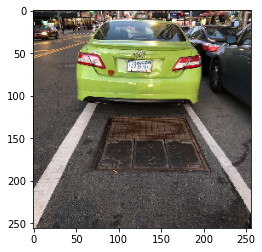

In [107]:
img, label = img_gen.next()
print('Predicted class:', np.round(model.predict(img)))
print('Actual class:', label)
plt.imshow(np.squeeze(img))

In [108]:
explanation = explainer.explain_instance(np.squeeze(img).astype('double'), model.predict)

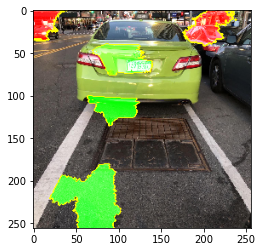

In [109]:
image, mask = explanation.get_image_and_mask(model.predict(img).argmax(axis=1)[0], 
                                             positive_only=False, hide_rest=False)
plt.imshow(mark_boundaries(image, mask))

Predicted class: [[0.]]
Actual class: [0.]


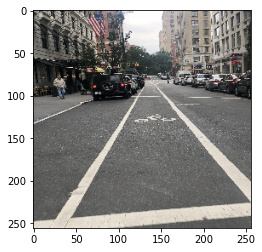

In [110]:
img, label = img_gen.next()
print('Predicted class:', np.round(model.predict(img)))
print('Actual class:', label)
plt.imshow(np.squeeze(img))

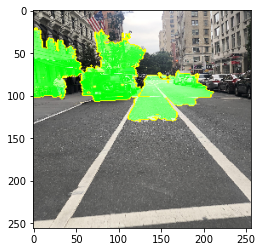

In [111]:
explanation = explainer.explain_instance(np.squeeze(img).astype('double'), model.predict)
image, mask = explanation.get_image_and_mask(model.predict(img).argmax(axis=1)[0], 
                                             positive_only=False, hide_rest=False)
plt.imshow(mark_boundaries(image, mask))


Predicted class: [[0.]]
Actual class: [0.]


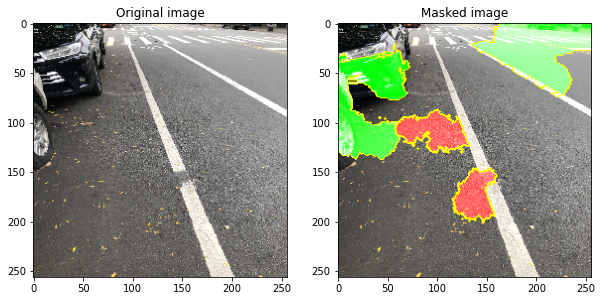

In [118]:
show_explanation(img_gen, model)


Predicted class: [[0.]]
Actual class: [0.]


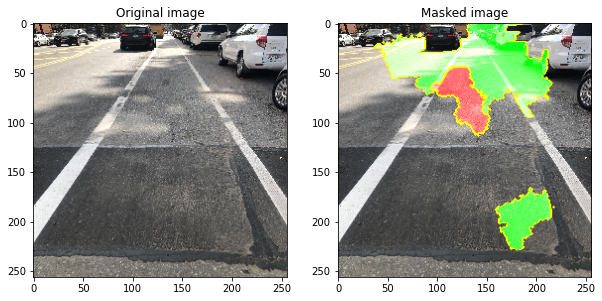

In [119]:
show_explanation(img_gen, model)


Predicted class: [[0.]]
Actual class: [0.]


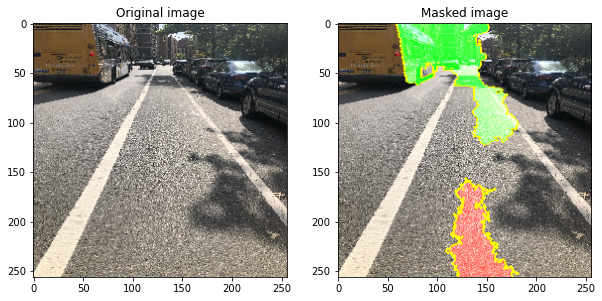

In [127]:
show_explanation(img_gen, model)


Predicted class: [[1.]]
Actual class: [1.]


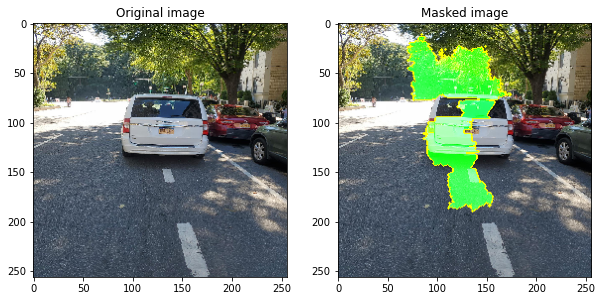

In [128]:
show_explanation(img_gen, model)


Predicted class: [[1.]]
Actual class: [1.]


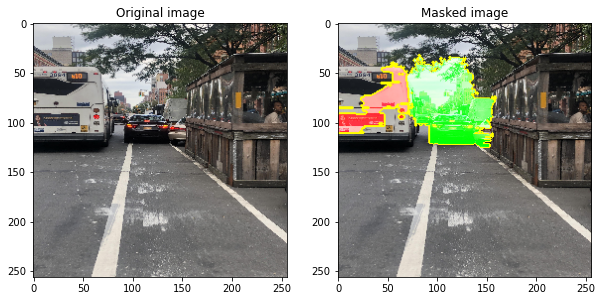

In [131]:
show_explanation(img_gen, model)


Predicted class: [[1.]]
Actual class: [1.]


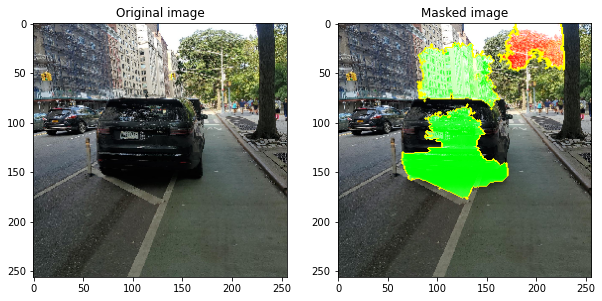

In [132]:
show_explanation(img_gen, model)


Predicted class: [[0.]]
Actual class: [0.]


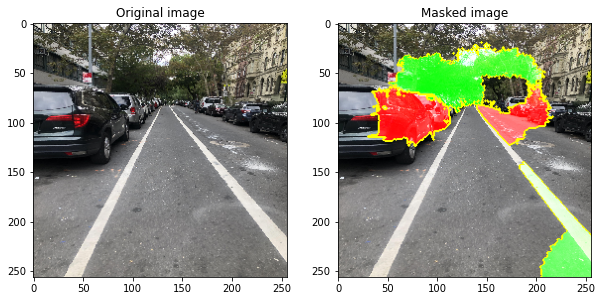

In [133]:
show_explanation(img_gen, model)


Predicted class: [[0.]]
Actual class: [1.]


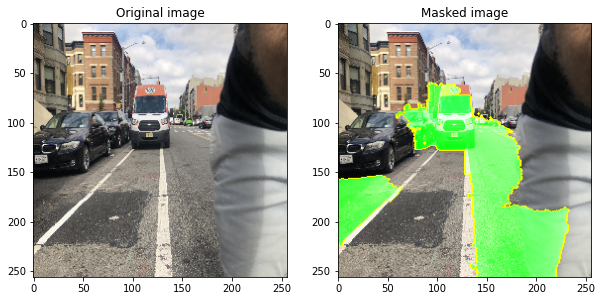

In [134]:
show_explanation(img_gen, model)

**Misclassified image alert!** What's especially interesting is that it recognized the vehicle in the lane, but used that as a reason to predict this as the non-target class...maybe need more images of vehicles in bike lanes from the front?


Predicted class: [[0.]]
Actual class: [0.]


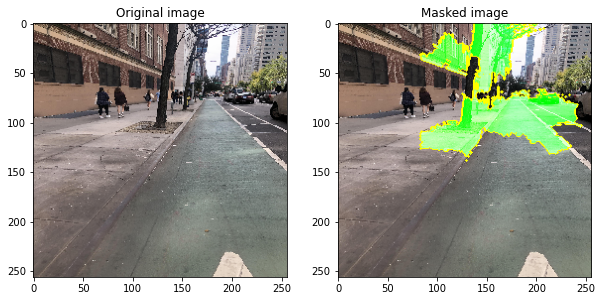

In [135]:
show_explanation(img_gen, model)


Predicted class: [[1.]]
Actual class: [1.]


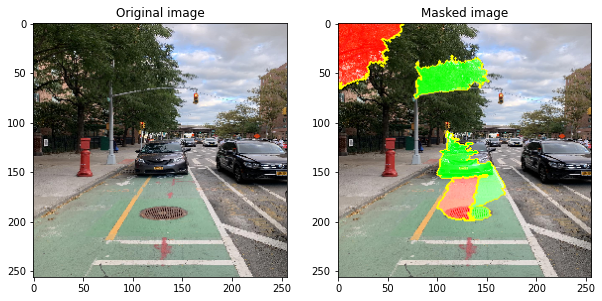

In [136]:
show_explanation(img_gen, model)


Predicted class: [[0.]]
Actual class: [0.]


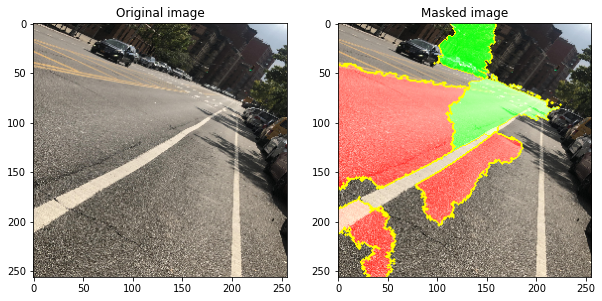

In [145]:
show_explanation(img_gen, model)


Predicted class: [[0.]]
Actual class: [0.]


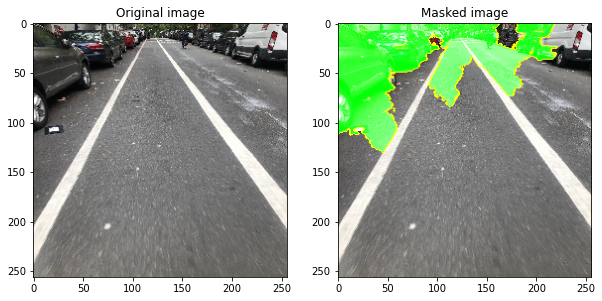

In [147]:
show_explanation(img_gen, model)


Predicted class: [[1.]]
Actual class: [1.]


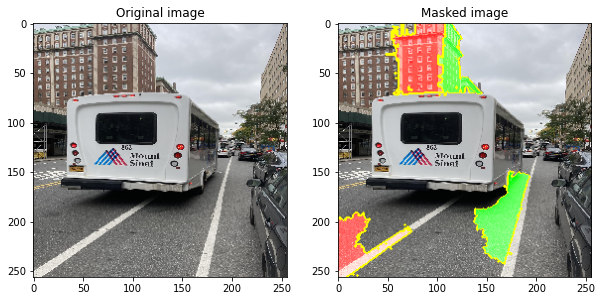

In [148]:
show_explanation(img_gen, model)


Predicted class: [[0.]]
Actual class: [0.]


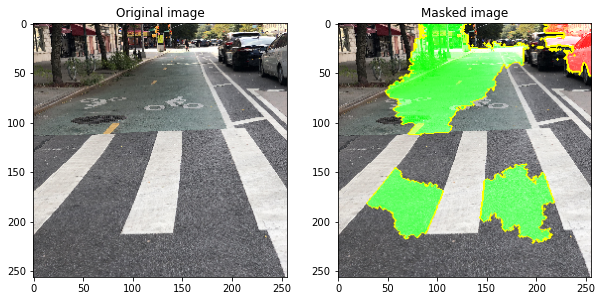

In [146]:
show_explanation(img_gen, model)

I think I need a more intentional way to use this tool--like maybe looking specifically at misclassified images? Or comparing the main features across several target vs non-target images? (Maybe a grid of 9 each, with masks?)

After visualizing/inspecting several images and the explainer generated for each, it appears as though my model is mostly basing its predictions off of the actually most important features in the image, getting it right quite a bit of the time!

In the images above, it correctly identifies the vehicles in the bike lanes in the target classes. It attends to the horizon line/where the bike lane lines appear to meet near the top of the photo for non-target classes. Huzzah!

**Possible next steps:**
 - More data to train the model.
 - Deeper model--add more layers to pick up on more patterns.
 - Try transfer learning--load a pre-trained ImageNet model from Keras and then train it on my images
 - Use a pre-trained object detection model that can ID cars? Can that be trained on my images? Or applied to them?